In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('log.csv')
df.head()

,cycle,mode,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,...,opp_player_4_kick,opp_player_4_dist,opp_player_4_area,opp_player_5_x,opp_player_5_y,opp_player_5_vx,opp_player_5_vy,opp_player_5_kick,opp_player_5_dist,opp_player_5_area
0,421,play_on,-26.4266,-28.4263,-1.8165,0.4374,1,-40.6874,-5.3881,-0.0766,...,0,29.220594,0,-20.7132,-29.4389,-0.2120,0.0566,0,31.263551,0
1,422,play_on,-28.2004,-27.9994,-1.6675,0.4013,1,-40.9578,-6.1488,-0.1082,...,0,29.738884,0,-21.4979,-29.2106,-0.2911,0.0847,0,30.175061,0
2,423,play_on,-29.8278,-27.5923,-1.5297,0.3826,1,-41.2283,-7.0106,-0.1082,...,0,28.885839,0,-22.9478,17.4070,-0.0603,0.0012,0,30.502391,0
3,424,play_on,-31.3757,-27.2134,-1.4551,0.3562,1,-41.5153,-7.9394,-0.1148,...,0,28.603467,0,-23.4223,16.9508,-0.1954,-0.1878,0,30.771394,0
4,425,play_on,-32.8175,-26.8181,-1.3553,0.3716,1,-41.8329,-8.7905,-0.1270,...,0,28.318141,0,-23.9871,16.3070,-0.2325,-0.2650,0,30.795407,0


one-hot encode the mode column

In [65]:
df = pd.get_dummies(df, columns=['mode']).astype('float32')
df = df.astype('float32')
df = df.drop('cycle', axis=1)
df.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
0,-26.426600,-28.426300,-1.8165,0.4374,1.0,-40.687401,-5.3881,-0.0766,-0.2327,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-28.200399,-27.999399,-1.6675,0.4013,1.0,-40.957802,-6.1488,-0.1082,-0.3043,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-29.827801,-27.592300,-1.5297,0.3826,1.0,-41.228298,-7.0106,-0.1082,-0.3447,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-31.375700,-27.213400,-1.4551,0.3562,1.0,-41.515301,-7.9394,-0.1148,-0.3715,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-32.817501,-26.818100,-1.3553,0.3716,1.0,-41.832901,-8.7905,-0.1270,-0.3404,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


normalize the data

In [66]:
for col in df.columns:
    if col != 'my_dash_power' and col != 'my_dash_dir' and col != 'my_turn':
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

split the data into train and test

In [67]:
train = df.sample(frac=0.8, random_state=200)

split the data into train and validation

In [68]:
validation = df.drop(train.index)
train.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
71589,0.971587,0.699369,0.375538,0.487628,0.333333,0.429493,0.632545,0.345225,0.460793,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34897,0.145410,0.846977,0.484202,0.407590,0.666667,0.126713,0.643489,0.502596,0.496011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71431,0.229355,0.998804,0.494190,0.501477,0.666667,0.143500,0.645084,0.502596,0.496011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41764,0.875269,0.806967,0.700593,0.245082,0.333333,0.261055,0.609565,0.570558,0.461249,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7596,0.998483,0.001081,0.494190,0.501477,0.333333,0.333459,0.416931,0.355724,0.492706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


add layers to the model

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(len(df.columns) - 3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # drop 20% of the neurons
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # drop 20% of the neurons
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

In [70]:
model.compile(optimizer='adam', loss='mse')

In [71]:
model.fit(train.drop(columns=['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), train.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']], epochs=100, validation_data=(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']]))

Epoch 1/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1592.6152 - val_loss: 1534.4631
Epoch 2/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1529.5010 - val_loss: 1482.3845
Epoch 3/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1506.4800 - val_loss: 1457.7410
Epoch 4/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1492.3317 - val_loss: 1448.7456
Epoch 5/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1487.2213 - val_loss: 1450.0049
Epoch 6/100
2002/2002 [==============================] - 3s 2ms/step - loss: 1480.7568 - val_loss: 1439.7013
Epoch 7/100
2002/2002 [==============================] - 3s 2ms/step - loss: 1472.7610 - val_loss: 1451.0341
Epoch 8/100
2002/2002 [==============================] - 4s 2ms/step - loss: 1469.7784 - val_loss: 1463.0773
Epoch 9/100
2002/2002 [==============================] - 3s 2ms/step - loss: 1465.8103 - val_loss: 1441.7866
Epoch 10/100
2002/2

plot the loss

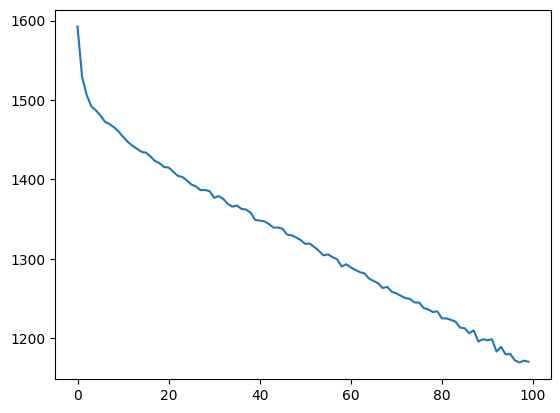

In [72]:
plt.plot(model.history.history['loss'])

plot the validation loss

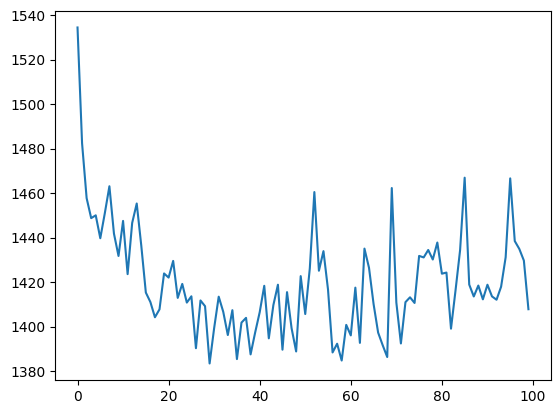

In [73]:
plt.plot(model.history.history['val_loss'])

save the model

In [74]:
model.save('model.h5')

/Users/hasan/Documents/final-project/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
model.evaluate(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']])

501/501 [==============================] - 0s 595us/step - loss: 1407.7955


1407.7955322265625

In [76]:
model.predict(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1))

501/501 [==============================] - 0s 539us/step


array([[ 8.3050179e+01,  6.1286563e-01, -4.5121064e+00],
       [ 7.4601974e+01,  7.3039269e-01, -4.0048428e+00],
       [ 6.6166550e+01,  3.8029575e-01, -4.8761325e+00],
       ...,
       [ 2.3050367e+01,  7.4521303e-02, -1.0995122e+01],
       [ 6.6582993e+01,  2.8317451e-01, -3.7764125e+00],
       [ 8.1035061e+00,  2.3755264e-01,  5.6150810e+01]], dtype=float32)

In [77]:
result_df = validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']]

In [78]:
result_df.head(3)

,my_dash_power,my_dash_dir,my_turn
3,100.0,6.0,37.0
4,100.0,4.0,-39.0
14,100.0,0.0,-49.0


save in result.csv

In [79]:
result_df.to_csv('result.csv', index=False)